#### The dataset and data manual for this notebook can be found at: 
https://github.com/fivethirtyeight/data/tree/master/college-majors

### In this project I use various plotting functions to explore job outcomes of students who graduated from college between 2010 and 20121

In [192]:
import pandas as pd
import numpy as np

from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

%matplotlib inline

In [193]:
recent_grads  = pd.read_csv('recent-grads.csv')

# Explore the data

#### Print out the first row of the dataframe formatted as a table

In [194]:
recent_grads.iloc[:0]

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs


In [195]:
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [196]:
recent_grads.tail()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


### Get a summary of the data in the dataset

In [197]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


From above we get the statistics of all the data for each row of the dataset.


## Data cleaning and data preperation for plotting

#### Drop rows with missing values. Matplotlib expects that columns of values we pass in have matching lengths and missing values will cause matplotlib to throw errors.

In [198]:
raw_data_count = recent_grads.shape
raw_data_count = raw_data_count[0] #get the first part of the tuple

In [199]:
raw_data_count #view the number of rows

173

In [200]:
recent_grads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
Rank                    173 non-null int64
Major_code              173 non-null int64
Major                   173 non-null object
Total                   172 non-null float64
Men                     172 non-null float64
Women                   172 non-null float64
Major_category          173 non-null object
ShareWomen              172 non-null float64
Sample_size             173 non-null int64
Employed                173 non-null int64
Full_time               173 non-null int64
Part_time               173 non-null int64
Full_time_year_round    173 non-null int64
Unemployed              173 non-null int64
Unemployment_rate       173 non-null float64
Median                  173 non-null int64
P25th                   173 non-null int64
P75th                   173 non-null int64
College_jobs            173 non-null int64
Non_college_jobs        173 non-null int64
Low_wage_jobs          

#### We can see that there are 173 rows of data. now we will about deleting the rows that contain missing values so we can use Matplotlib successfully

In [201]:
nan_entries = recent_grads.isna().sum()

In [202]:
nan_entries

Rank                    0
Major_code              0
Major                   0
Total                   1
Men                     1
Women                   1
Major_category          0
ShareWomen              1
Sample_size             0
Employed                0
Full_time               0
Part_time               0
Full_time_year_round    0
Unemployed              0
Unemployment_rate       0
Median                  0
P25th                   0
P75th                   0
College_jobs            0
Non_college_jobs        0
Low_wage_jobs           0
dtype: int64

#### From above we can see that there is one null entry for the men, women, sharewomen and total columns. We will now drop those entries from the dataset

In [203]:
recent_grads.dropna(inplace=True) #write the chages to the dataframe

In [204]:
recent_grads.isna().sum()

Rank                    0
Major_code              0
Major                   0
Total                   0
Men                     0
Women                   0
Major_category          0
ShareWomen              0
Sample_size             0
Employed                0
Full_time               0
Part_time               0
Full_time_year_round    0
Unemployed              0
Unemployment_rate       0
Median                  0
P25th                   0
P75th                   0
College_jobs            0
Non_college_jobs        0
Low_wage_jobs           0
dtype: int64

#### From above we can see that we successfully removed the null entries and reassigned the dataset accordingly

In [205]:
recent_grads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172 entries, 0 to 172
Data columns (total 21 columns):
Rank                    172 non-null int64
Major_code              172 non-null int64
Major                   172 non-null object
Total                   172 non-null float64
Men                     172 non-null float64
Women                   172 non-null float64
Major_category          172 non-null object
ShareWomen              172 non-null float64
Sample_size             172 non-null int64
Employed                172 non-null int64
Full_time               172 non-null int64
Part_time               172 non-null int64
Full_time_year_round    172 non-null int64
Unemployed              172 non-null int64
Unemployment_rate       172 non-null float64
Median                  172 non-null int64
P25th                   172 non-null int64
P75th                   172 non-null int64
College_jobs            172 non-null int64
Non_college_jobs        172 non-null int64
Low_wage_jobs          

In [206]:
cleaned_data_count = recent_grads.shape
#cleaned_data_count = raw_data_count[0] #get the first part of the tuple

In [207]:
cleaned_data_count = cleaned_data_count[0] #show the revised number of rows

In [208]:
num_rows_removed = raw_data_count - cleaned_data_count
print('The number of null rows removed is ', num_rows_removed)

The number of null rows removed is  1


#### The count from above verifies that we only removed one bad row of data

# Now let's explore data relationships.


### Compare: Sample_size and Median

This plot compares the median earnings of full-time, year-round workers

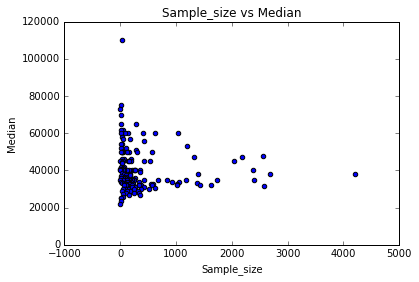

In [209]:
ax = recent_grads.plot(x='Sample_size', y='Median', kind='scatter')
ax.set_title('Sample_size vs Median')

### Compare: Sample_size and Unemployment_rate

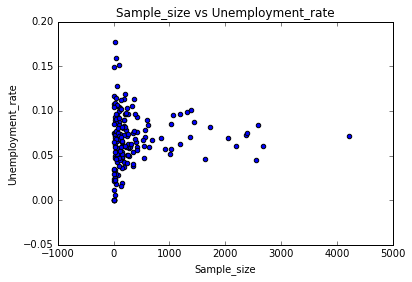

In [210]:
ax = recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter')
ax.set_title('Sample_size vs Unemployment_rate')

As the plot above indicates, most of the students sampled were unemployed  at the time of sampling.

### Compare: Full_time and Median

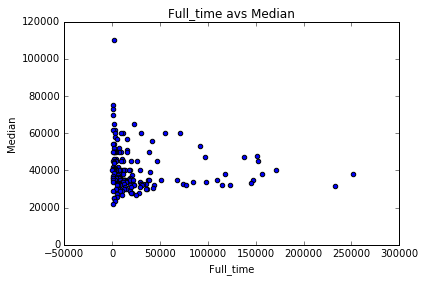

In [211]:
ax = recent_grads.plot(x='Full_time', y='Median', kind='scatter')
ax.set_title('Full_time avs Median')

Again we can see that most of those sampled did not have full-time jobs

### Compare: ShareWomen and Unemployment_rate.

This compares the women as a share of the total sampling

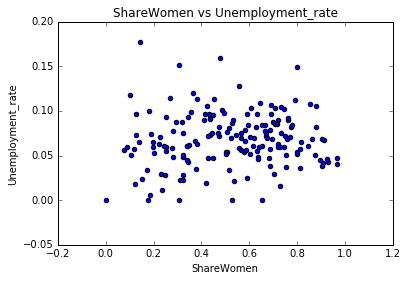

In [212]:
ax = recent_grads.plot(x='ShareWomen', y='Unemployment_rate', kind='scatter')
ax.set_title('ShareWomen vs Unemployment_rate')

From the plot above it looks like women as a sampling group in general had were unemployed across the sampling range

### Compare: Men and Median

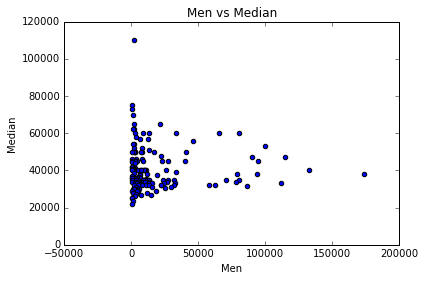

In [213]:
ax = recent_grads.plot(x='Men', y='Median', kind='scatter')
ax.set_title('Men vs Median')

### Compare: women and Median

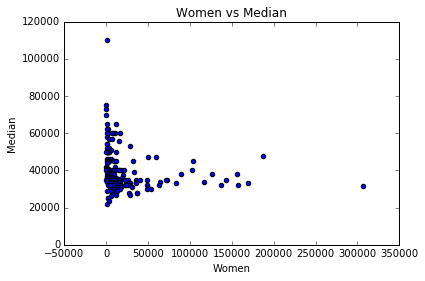

In [214]:
ax = recent_grads.plot(x='Women', y='Median', kind='scatter')
ax.set_title('Women vs Median')

# Pandas Histograms

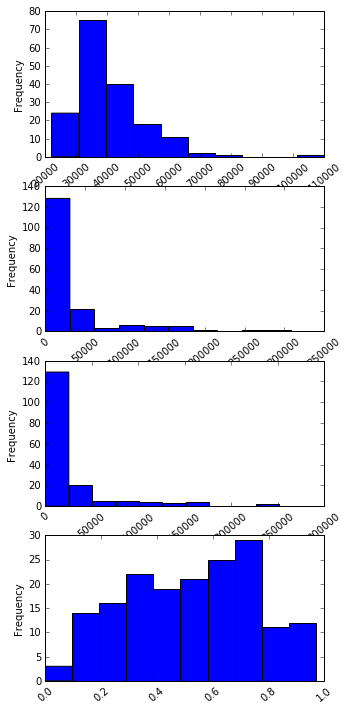

In [215]:


cols = ["Sample_size", "Median", "Employed", "Full_time", "ShareWomen", "Unemployment_rate", "Men", "Women"]

fig = plt.figure(figsize=(5,12))
for r in range(1,5):
    ax = fig.add_subplot(4,1,r)
    ax = recent_grads[cols[r]].plot(kind='hist', rot=40)



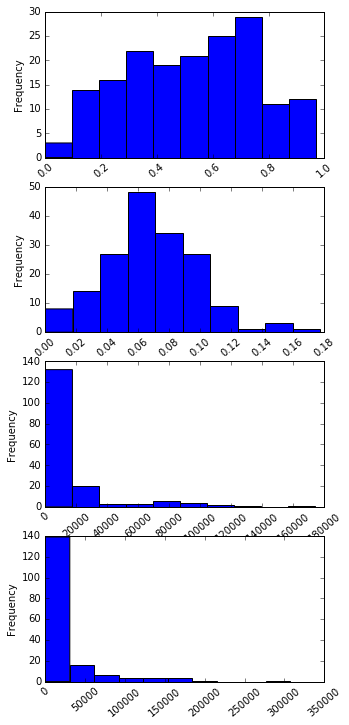

In [233]:
cols = ["Sample_size", "Median", "Employed", "Full_time", "ShareWomen", "Unemployment_rate", "Men", "Women"]

fig = plt.figure(figsize=(5,12))
for r in range(4,8):
    ax = fig.add_subplot(4,1,r-3)
    ax = recent_grads[cols[r]].plot(kind='hist', rot=40)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1412cc2748>,
      dtype=object)

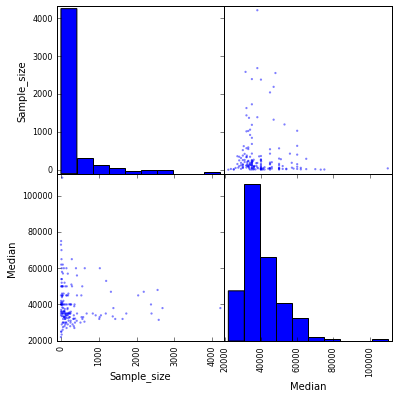

In [234]:
from pandas.plotting import scatter_matrix
scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize=(6,6))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f14126193c8>,
      dtype=object)

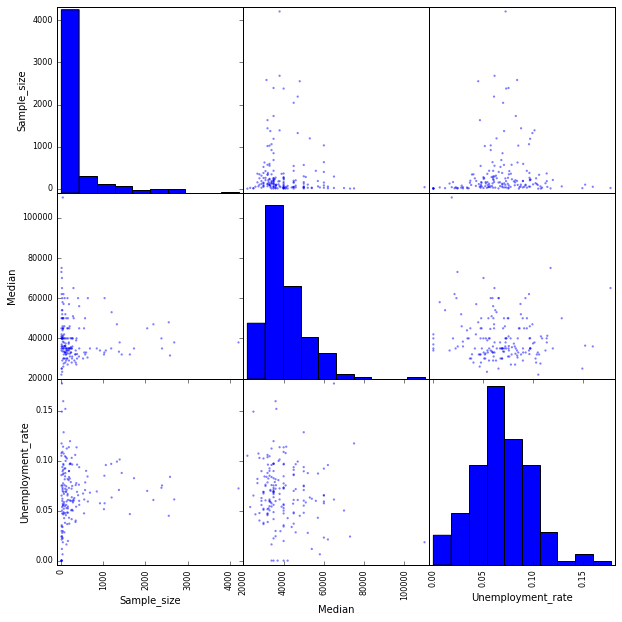

In [235]:
scatter_matrix(recent_grads[['Sample_size', 'Median', 'Unemployment_rate']], figsize=(10,10))

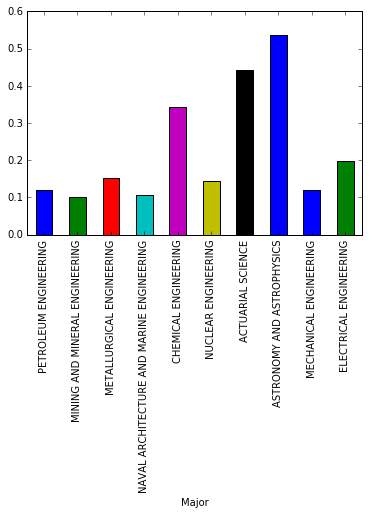

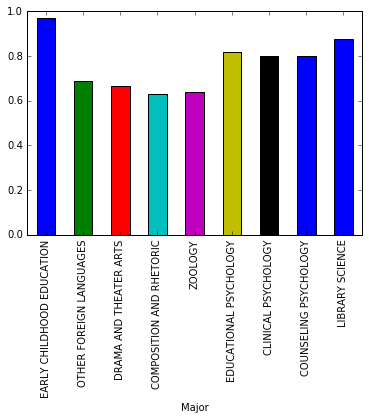

In [237]:
recent_grads[:10].plot.bar(x='Major', y='ShareWomen', legend=False)
recent_grads[163:].plot.bar(x='Major', y='ShareWomen', legend=False)

